In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.lines import Line2D


In [20]:
# Data Load
df_2020 = pd.read_csv(r'C:\Users\adien\OneDrive\Desktop\Senior Design Capstone\post_model\sentiment_results_2020.csv')
df_2024 = pd.read_csv(r'C:\Users\adien\OneDrive\Desktop\Senior Design Capstone\post_model\sentiment_results_2024.csv')

In [21]:
#prep and combine data frames
df_2020['order'] = df_2020.index
df_2020['year'] = 2020
df_2024['order'] = df_2024.index
df_2024['year'] = 2024

df_combined = pd.concat([df_2020, df_2024], ignore_index=True)
df_combined['is_negative'] = df_combined['embedding_negative'] > 0.6


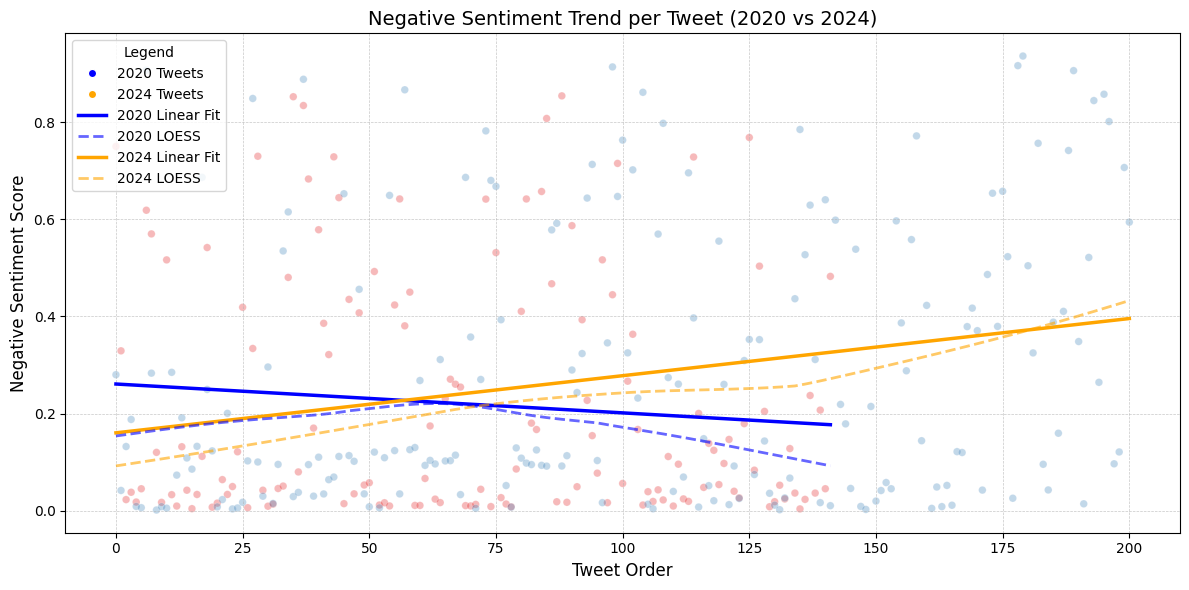

In [22]:
#plot
plt.figure(figsize=(12, 6))

#points for both years
sns.scatterplot(data=df_combined, x='order', y='embedding_negative', hue='year',
                alpha=0.3, s=30, palette='Set1', legend=False)

# Linear regression lines
for year, color in zip([2020, 2024], ['blue', 'orange']):
    df_year = df_combined[df_combined['year'] == year]
    X = sm.add_constant(df_year['order'])
    model = sm.OLS(df_year['embedding_negative'], X).fit()
    plt.plot(df_year['order'], model.predict(X), color=color, linewidth=2.5)

# LOESS lines
sns.regplot(data=df_2020, x='order', y='embedding_negative',
            lowess=True, scatter=False, color='blue',
            line_kws={'linestyle': '--', 'linewidth': 2, 'alpha': 0.6})

sns.regplot(data=df_2024, x='order', y='embedding_negative',
            lowess=True, scatter=False, color='orange',
            line_kws={'linestyle': '--', 'linewidth': 2, 'alpha': 0.6})

# legend
custom_lines = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=6, label='2020 Tweets'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=6, label='2024 Tweets'),
    Line2D([0], [0], color='blue', linewidth=2.5, label='2020 Linear Fit'),
    Line2D([0], [0], color='blue', linestyle='--', linewidth=2, alpha=0.6, label='2020 LOESS'),
    Line2D([0], [0], color='orange', linewidth=2.5, label='2024 Linear Fit'),
    Line2D([0], [0], color='orange', linestyle='--', linewidth=2, alpha=0.6, label='2024 LOESS'),
]

plt.legend(handles=custom_lines, title="Legend", loc='upper left')
plt.title("Negative Sentiment Trend per Tweet (2020 vs 2024)", fontsize=14)
plt.xlabel("Tweet Order", fontsize=12)
plt.ylabel("Negative Sentiment Score", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#summary
print("\nRegression Summary for 2020")
X_2020 = sm.add_constant(df_2020['order'])
model_2020 = sm.OLS(df_2020['embedding_negative'], X_2020).fit()
print(model_2020.summary())

print("\nRegression Summary for 2024")
X_2024 = sm.add_constant(df_2024['order'])
model_2024 = sm.OLS(df_2024['embedding_negative'], X_2024).fit()
print(model_2024.summary())


=== Regression Summary for 2020 ===
                            OLS Regression Results                            
Dep. Variable:     embedding_negative   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.372
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.244
Time:                        21:38:58   Log-Likelihood:                -2.3636
No. Observations:                 142   AIC:                             8.727
Df Residuals:                     140   BIC:                             14.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          


=== Proportion of Strongly Negative Tweets (> 0.6) ===
year
2020    0.120
2024    0.179
Name: is_negative, dtype: float64


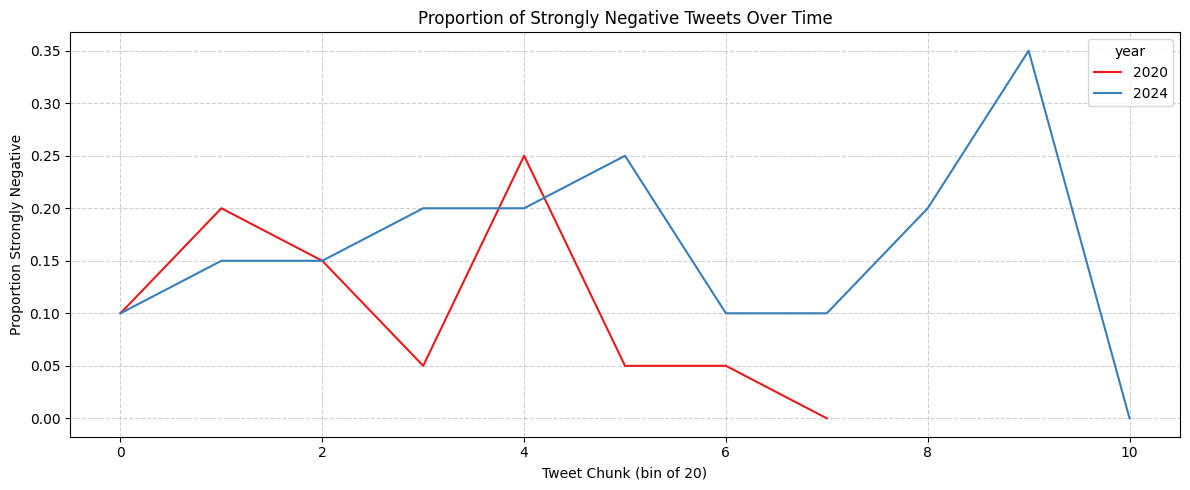

In [24]:

print("\n=== Proportion of Strongly Negative Tweets (> 0.6) ===")
print(df_combined.groupby('year')['is_negative'].mean().round(3))


df_combined['bin'] = df_combined['order'] // 20
neg_trend = df_combined.groupby(['year', 'bin'])['is_negative'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=neg_trend, x='bin', y='is_negative', hue='year', palette='Set1')
plt.title("Proportion of Strongly Negative Tweets Over Time")
plt.xlabel("Tweet Chunk (bin of 20)")
plt.ylabel("Proportion Strongly Negative")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
